In [21]:
import pandas as pd 
import numpy as np
import yfinance as yf 
import pandas_ta as ta
%matplotlib inline
%autosave 1
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

Autosaving every 1 seconds


In [22]:
ticker = yf.download(tickers='^NSEI',interval='1D')
ticker

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2022-01-17,18235.650391,18321.550781,18228.750000,18308.099609,18308.099609,266700
2022-01-18,18337.199219,18350.949219,18085.900391,18113.050781,18113.050781,227500
2022-01-19,18129.199219,18129.199219,17884.900391,17938.400391,17938.400391,276700


In [23]:
ticker.drop(['Adj Close','Volume'],axis = 1,inplace= True)
ticker

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805
...,...,...,...,...
2022-01-17,18235.650391,18321.550781,18228.750000,18308.099609
2022-01-18,18337.199219,18350.949219,18085.900391,18113.050781
2022-01-19,18129.199219,18129.199219,17884.900391,17938.400391


In [50]:
df = pd.DataFrame(ticker['Close'])
df

,Close
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805
...,...
2022-01-17,18308.099609
2022-01-18,18113.050781
2022-01-19,17938.400391


In [51]:
#rsi
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

df['rsi_14'] = get_rsi(df['Close'], 14)

In [58]:
data = pd.DataFrame(df['rsi_14'])
data = data.dropna()
data

,rsi_14
Date,
2007-09-21,100.000000
2007-09-24,100.000000
2007-09-25,100.000000
2007-09-26,100.000000
2007-09-27,100.000000
...,...
2022-01-17,70.205777
2022-01-18,62.218710
2022-01-19,56.067807


In [67]:
seen , unseen = data[:1000] , data[1000:]

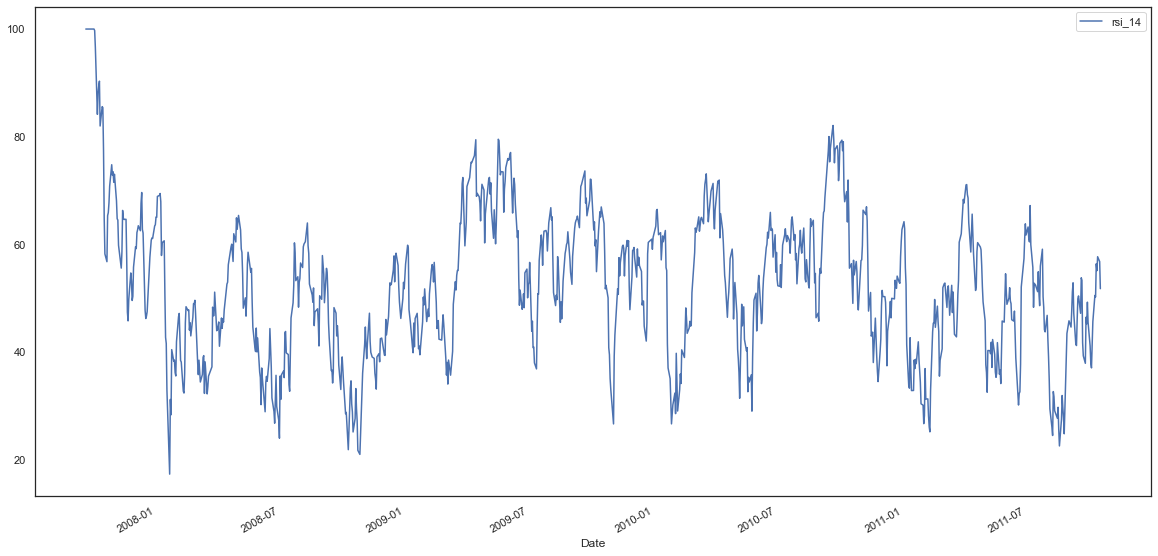

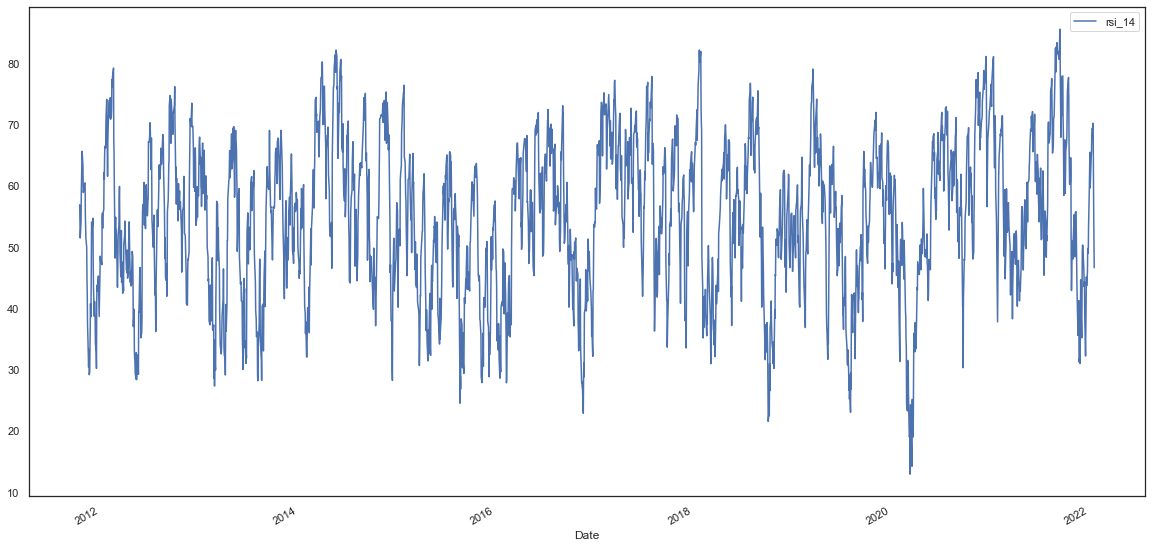

In [68]:
seen.plot();
unseen.plot();

In [69]:
from auto_ts import auto_timeseries

In [70]:
model = auto_timeseries(forecast_period=500,
                        score_type='rmse', time_interval='D',
                        model_type='best'
                       )

In [71]:
seen.reset_index(inplace=True)
seen

,Date,rsi_14
0,2007-09-21,100.000000
1,2007-09-24,100.000000
2,2007-09-25,100.000000
3,2007-09-26,100.000000
4,2007-09-27,100.000000
...,...,...
995,2011-10-12,56.352510
996,2011-10-13,55.088272
997,2011-10-14,57.672186
998,2011-10-17,56.764667


Start of Fit.....
    Target variable given as = rsi_14
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['rsi_14']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (1000, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
       Adding daily seasonality to Prophet with period=12, fourier_order=15 and prior_scale=0.10
  Starting Prophet Cross Validation
Lowering forecast period to 166 to enable cross_validation
Max. ite

 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=5799.637, Time=0.86 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=5801.066, Time=2.78 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=5799.278, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=5799.544, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=5798.245, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=5800.983, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[12] intercept
Total fit time: 11.474 seconds
Refitting data with previously found best parameters
    Best aic metric = 5775.2
                               SARIMAX Results                                
Dep. Variable:                 rsi_14   No. Observations:                 1000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2882.579
Date:                Fri, 21 Jan 2022   AIC                           5775.157
Time:                        17:13:43   BIC                

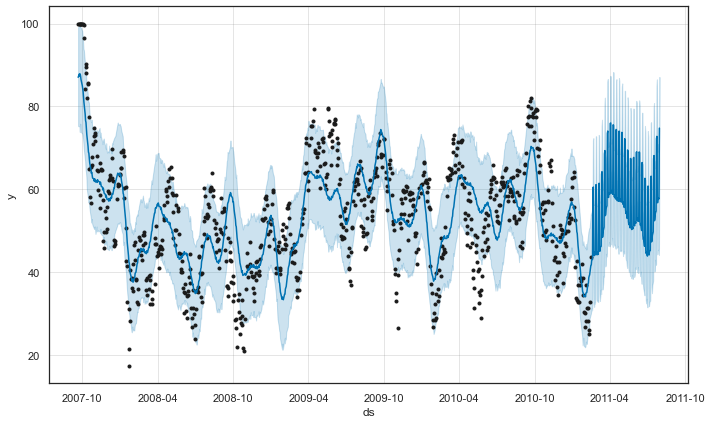

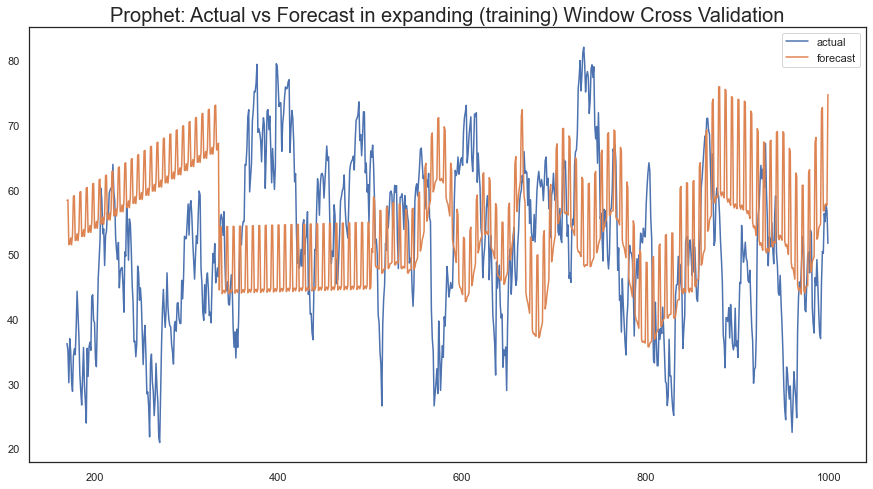

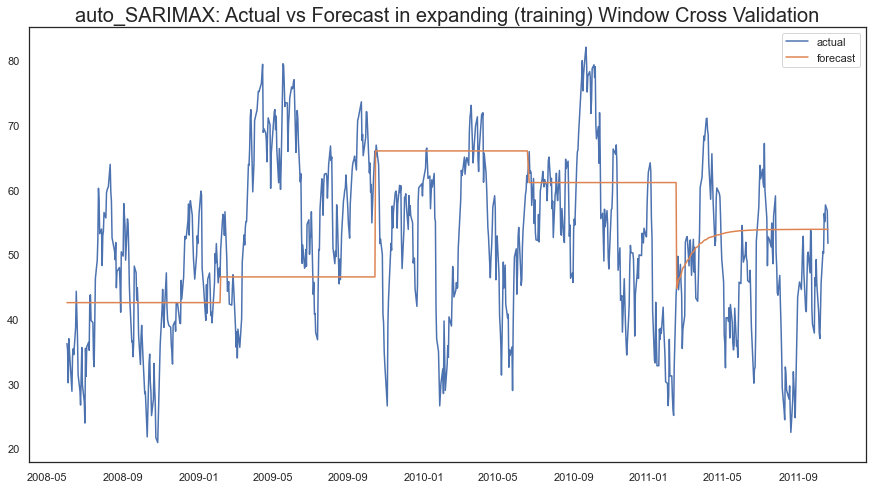

In [72]:
model.fit(traindata= seen, 
          ts_column="Date",
          target='rsi_14')

In [ ]:
#for 500 sample rmse was around 700 points

In [78]:
future_predictions = model.predict(testdata=20)

Predicting using forecast period=20 as input for auto_SARIMAX model


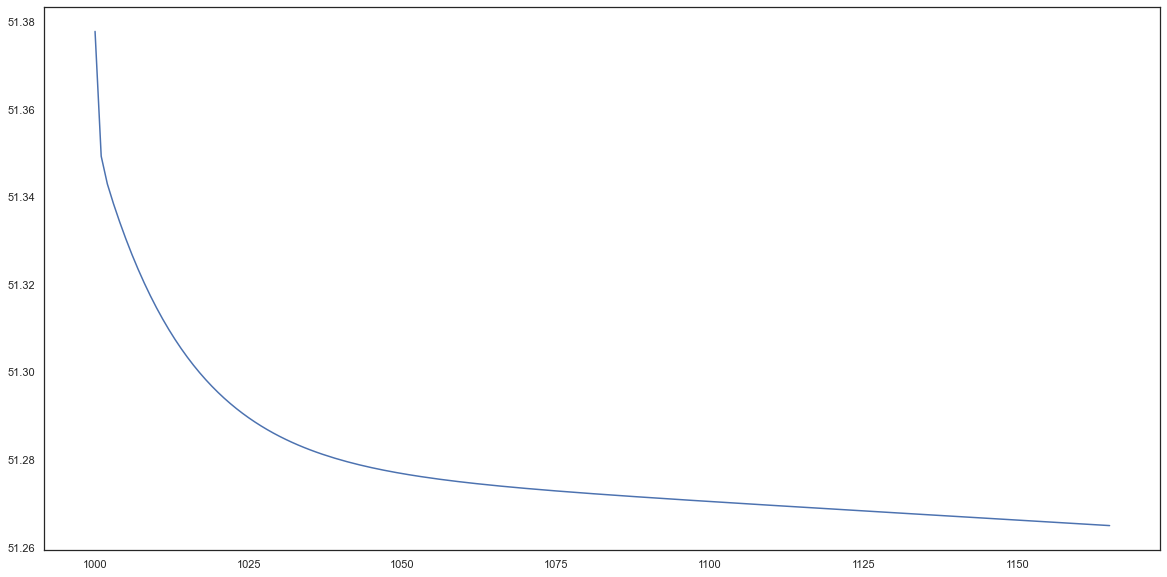

In [79]:
future_predictions.yhat.plot();